[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/metoranoia/SARIMA-Forecasting/blob/test-branch/forecasting.ipynb)

In [421]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [418]:
df = pd.read_csv("C:/Users/tori/OneDrive - Universitas Airlangga/Dokumen/Project (Portofolio)/SARIMA Forecasting/retail_sales_household_appliance_stores_FRED.csv")
df.head()

,DATE,SM443141USN
0,1/1/2010,1112
1,2/1/2010,1130
2,3/1/2010,1223
3,4/1/2010,1245
4,5/1/2010,1365


In [426]:
X = pd.to_datetime(df['DATE'])
y = df['SM443141USN']

In [399]:
#splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.19,shuffle=False)

In [430]:
#change df.DATE to month-year
month = pd.to_datetime(X.dt.strftime('%Y-%m'))
#create interactive time-series plot y_train
fig = go.Figure()
fig.add_trace(go.Scatter(x=month, y=y_train, showlegend=False))
fig.update_layout(title='Retail Sales Household Appliance Stores in US', xaxis_title='Year', yaxis_title='Total Retail Sales ($ Million)')
#add dots to the plot
fig.add_trace(go.Scatter(x=month, y=y_train, mode='markers', showlegend=False))
fig.show()

Figure(640x480)
Figure(640x480)
ADF Statistic: -2.375692029230461
p-value: 0.14871500545331834
Critical Values:
   1%: -3.4901313156261384
   5%: -2.8877122815688776
   10%: -2.5807296460459184


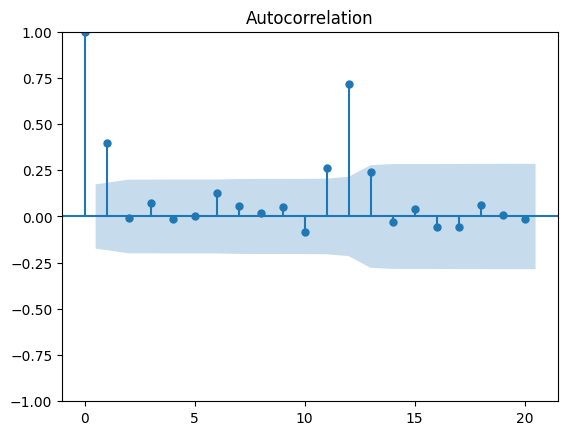

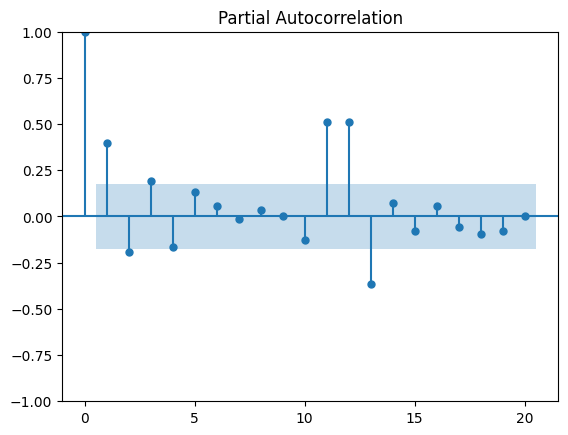

In [402]:
#Plot ACF and PACF
print(plot_acf(y_train, lags=20))
print(plot_pacf(y_train, lags=20))
def adf(x):
    result = adfuller(x)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
adf(y_train_box)

Figure(640x480)
Figure(640x480)
ADF Statistic: -5.5246450472049276
p-value: 1.8444364031036594e-06
Critical Values:
   1%: -3.489057523907491
   5%: -2.887246327182993
   10%: -2.5804808802708528


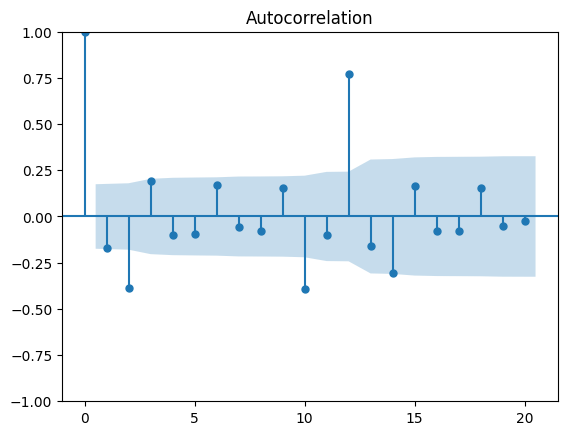

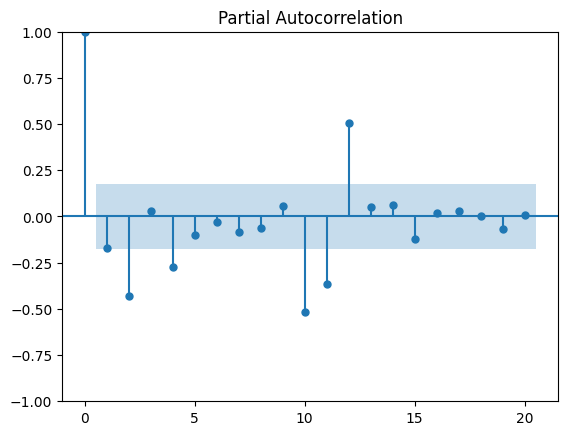

In [404]:
#diff = 1
diff_1 = np.diff(y_train,1)
print(plot_acf(diff_1, lags=20))
print(plot_pacf(diff_1, lags=20))
adf(diff_1)

Figure(640x480)
Figure(640x480)
ADF Statistic: -14.64814355605659
p-value: 3.53545119037649e-27
Critical Values:
   1%: -3.497501033
   5%: -2.89090644
   10%: -2.5824349


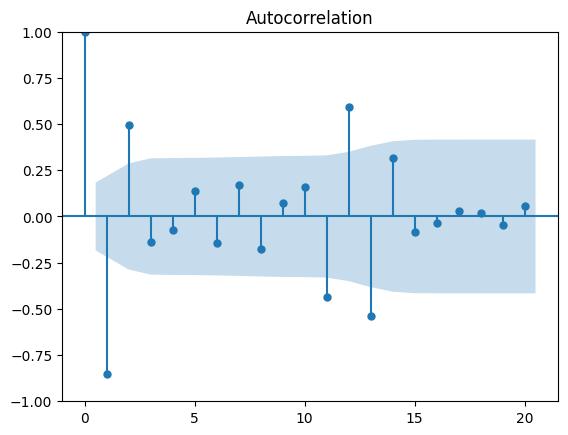

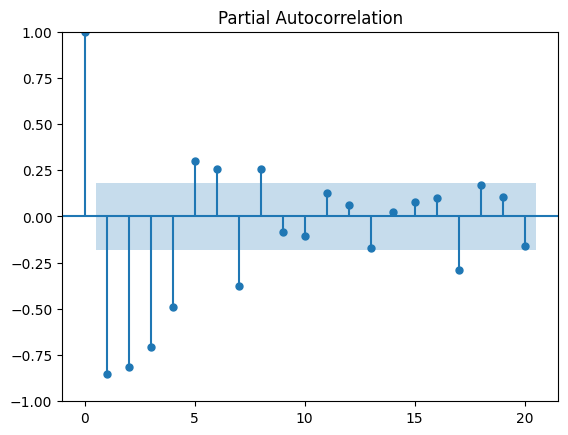

In [405]:
#diff = 12
diff_12 = np.diff(diff_1,12)
print(plot_acf(diff_12, lags=20))
print(plot_pacf(diff_12, lags=20))
adf(diff_12)

In [410]:
order = (2, 1, 0)
seasonal_order = (0, 1, 1, 12)
model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          SM443141USN   No. Observations:                  127
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -637.823
Date:                              Sun, 06 Aug 2023   AIC                           1283.646
Time:                                      16:03:15   BIC                           1294.591
Sample:                                           0   HQIC                          1288.088
                                              - 127                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4051      0.080     -5.055      0.000      -0.562      -0.248
ar.L2         -0.2435      0.100     -2.441      0.015      -0.439      -0.048
ma.S.L12      -0.4560      0.127     -3.599      0.000      -0.704      -0.208
sigma2      4130.7522    559.998      7.376      0.000    3033.176    5228.329
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                80.16
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                             0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [440]:
#forecast and count mape y_test and y_pred
y_pred = model_fit.forecast(steps=len(y_test))
#count mape
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('MAPE: %.3f' % mape, '%')

MAPE: 6.484 %


In [435]:
# Convert range objects to lists
time_index = month[range(len(y_train), len(y_train) + len(y_test))]  # Extend time index for forecasted data
time_index_list = list(time_index)
df_SM443141USN_list = list(df.SM443141USN)

# Create a Plotly figure
fig = go.Figure()

# Plot the original data using a scatter trace
fig.add_trace(go.Scatter(x=list(month), y=df_SM443141USN_list, mode='lines', showlegend=False, line=dict(color='blue')))
#add dots to the actual data
fig.add_trace(go.Scatter(x=list(month), y=df_SM443141USN_list, mode='markers', name='Actual', marker=dict(color='blue', size=5)))
# Plot the forecasted data with the extended time index using another scatter trace
fig.add_trace(go.Scatter(x=time_index_list, y=y_pred, mode='lines', showlegend=False, line=dict(color='red')))
#add dots to the forecasted data
fig.add_trace(go.Scatter(x=time_index_list, y=y_pred, mode='markers', name='Forecast', marker=dict(color='red', size=5)))

# Update the layout of the figure
fig.update_layout(title='SARIMA Forecast of Retail Sales Household Appliance Stores in US',
                  xaxis_title='Year',
                  yaxis_title='Total Retail Sales ($ Millions))',
                  legend=dict(x=0, y=1, traceorder='normal'))

# Show the interactive plot
fig.show()
